In [1]:
from AnalysisGiessen import analyseGiessen
import pandas as pd
import numpy as np 

In [2]:
n_sample = 5000
n_params = 6

sim_name = 'waveform'
file_path = f"../Data/Synthetic/Output_{n_sample}_{sim_name}/Posterior_sims/posterior_sim_{sim_name}"
file = pd.read_csv(f"{file_path}/pressure_traces_rv/all_pressure_traces_rv.csv")
#file = pd.read_csv(f"../Data/Synthetic/Output_5000/pressure_traces_rv/all_pressure_traces.csv")
file 

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,CO,dt,EF,dPAP,sPAP,mPAP
0,1.712975,2.822822,4.849658,7.770825,11.553669,16.149887,20.882783,24.470887,26.363860,26.993788,...,1.486191,1.486191,1.486191,1.709829,3.485647,0.008815,0.504683,0.161773,27.008248,8.941165
1,1.789125,2.763975,4.617939,7.330295,10.870724,15.199662,20.076135,24.337455,26.820204,27.672702,...,1.597557,1.597557,1.597557,1.753348,3.382729,0.008815,0.498407,0.174462,27.703162,8.911047
2,1.753113,2.757848,4.669091,7.465488,11.115778,15.579159,20.562311,24.802580,27.152470,27.835687,...,1.554847,1.554847,1.554847,1.715054,3.362249,0.008812,0.499719,0.158522,27.837288,8.858667
3,1.610573,2.595295,4.468479,7.209185,10.786770,15.161245,20.136650,24.584485,27.214866,28.083730,...,1.418838,1.418838,1.418838,1.575838,3.349992,0.008817,0.497485,0.151296,28.104990,8.901540
4,1.571372,2.597256,4.404208,6.972032,10.272023,14.267303,18.913213,23.737380,27.268181,28.601243,...,1.297173,1.297173,1.297173,1.544817,2.984756,0.008814,0.469478,0.132453,28.650474,8.704731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.642570,2.731034,4.718817,7.583698,11.293659,15.798200,20.430140,23.958942,25.865666,26.550537,...,1.422005,1.422005,1.422005,1.641499,3.500721,0.008807,0.505062,0.166200,26.580310,8.819001
96,1.610643,2.618338,4.458615,7.110908,10.545571,14.724220,19.585980,24.265149,27.321133,28.340442,...,1.381119,1.381119,1.381119,1.582324,3.155384,0.008812,0.483720,0.141822,28.361422,8.762922
97,1.942764,3.149492,5.352714,8.527802,12.639264,17.303206,21.369182,23.992564,25.335450,25.726675,...,1.703565,1.703565,1.703565,1.947742,3.574563,0.008805,0.516899,0.149127,26.363779,8.791313
98,1.714670,2.807311,4.885784,7.926846,11.896515,16.750426,21.980148,26.063869,27.989680,28.198709,...,1.501730,1.501730,1.501730,1.675728,3.316256,0.008809,0.502688,0.148880,28.275614,8.831722


In [3]:
# Repeat the first pressure trace 5 times
ind = 0
df = file.iloc[[ind], :100].T
df_repeated = pd.concat([df] * 6, axis=0, ignore_index=True)
df_repeated.columns = ["Pressure"]
df_repeated["cPressure"] = df_repeated['Pressure']
df_repeated["dt"] = file.loc[[ind], 'dt'].values[0]
df_repeated

,Pressure,cPressure,dt
0,1.712975,1.712975,0.008815
1,2.822822,2.822822,0.008815
2,4.849658,4.849658,0.008815
3,7.770825,7.770825,0.008815
4,11.553669,11.553669,0.008815
...,...,...,...
595,1.486191,1.486191,0.008815
596,1.486191,1.486191,0.008815
597,1.486191,1.486191,0.008815
598,1.486191,1.486191,0.008815


In [4]:
ag = analyseGiessen(df=df_repeated, t_resolution=df_repeated['dt'].values[0])

In [5]:
ag.df

,Pressure,cPressure,dt
0,1.712975,1.712975,0.008815
1,2.822822,2.822822,0.008815
2,4.849658,4.849658,0.008815
3,7.770825,7.770825,0.008815
4,11.553669,11.553669,0.008815
...,...,...,...
595,1.486191,1.486191,0.008815
596,1.486191,1.486191,0.008815
597,1.486191,1.486191,0.008815
598,1.486191,1.486191,0.008815


In [6]:
ag.compute_derivatives(use_filter=False)

In [7]:
ag.compute_points_of_interest(height=50, use_filter=False)
ag.points_df

,a_epad_ind,epad_ind,dia_ind,sys_ind,esp_ind,t_max_dpdt,a_epad,epad,s_a_epad,s_epad,...,A_p,P_max,esp,sys,EF,dia,tau,Ees/Ea,iT,iHR
0,136,105,45,109,131,0.528889,14.146338,16.149887,6.340692,4.849658,...,15.148113,48.595182,24.684965,26.993788,0.492029,0.192677,0.022917,0.968615,0.000000,0.000000
1,236,205,145,209,231,0.528889,14.146338,16.149887,6.340692,4.849658,...,15.148113,48.595182,24.684965,26.993788,0.492029,0.192677,0.022917,0.968615,0.881482,68.067214
2,336,305,245,309,331,0.528889,14.146338,16.149887,6.340692,4.849658,...,15.148113,48.595182,24.684965,26.993788,0.492029,0.192677,0.022917,0.968615,0.881482,68.067214
3,436,405,345,409,431,0.528889,14.146338,16.149887,6.340692,4.849658,...,15.148113,48.595182,24.684965,26.993788,0.492029,0.192677,0.022917,0.968615,0.881482,68.067214
4,536,505,445,509,531,0.528889,14.146338,16.149887,6.340692,4.849658,...,15.148113,48.595182,24.684965,26.993788,0.492029,0.192677,0.022917,0.968615,0.881482,68.067214


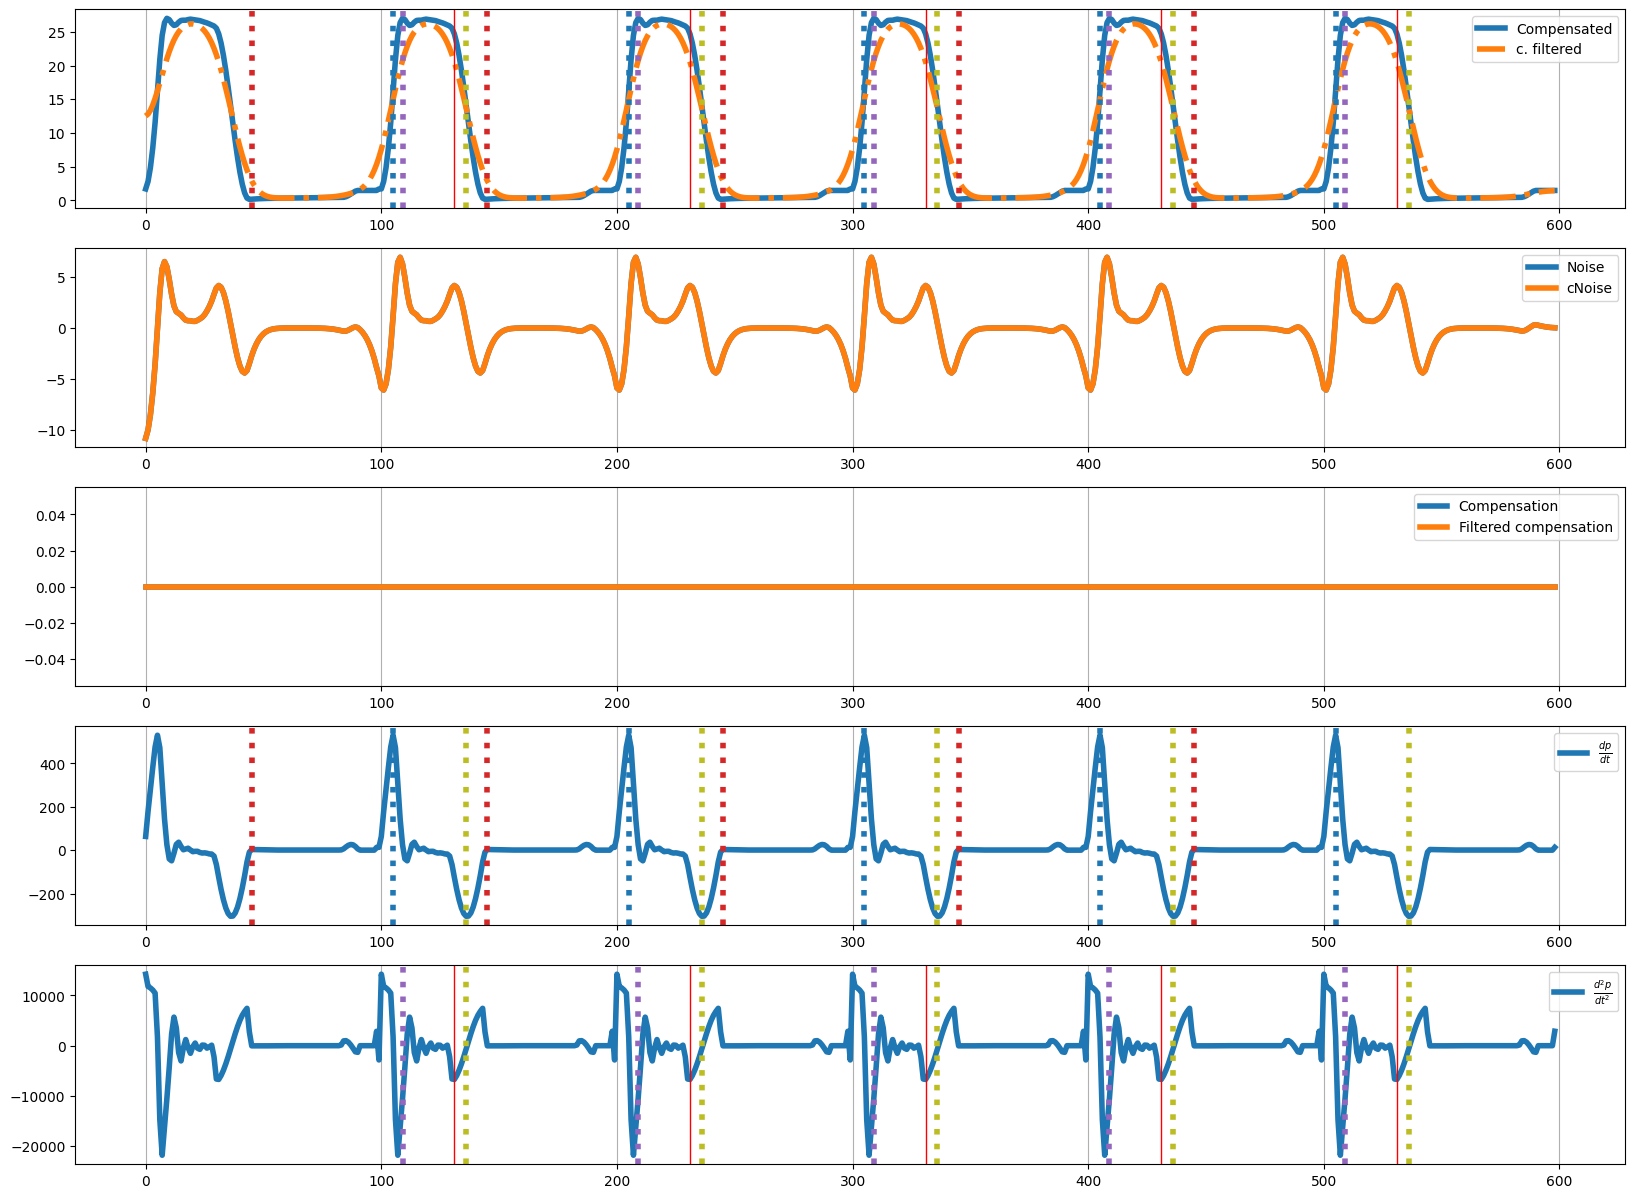

In [8]:
ag.plot_pressures()

In [9]:
ag._t_resolution

0.0088148164947297

In [10]:
beats = pd.DataFrame(ag.resample_heart_beat())
sumstats = ag.points_df

In [11]:
pd.concat([beats, sumstats.iloc[:-1,:]], axis=1)

,0,1,2,3,4,5,6,7,8,9,...,A_p,P_max,esp,sys,EF,dia,tau,Ees/Ea,iT,iHR
0,2.904872,2.295723,1.800488,1.407013,1.101695,0.870526,0.699946,0.577485,0.492176,0.43475,...,15.148113,48.595182,24.684965,26.993788,0.492029,0.192677,0.022917,0.968615,0.000000,0.000000
1,2.904872,2.295723,1.800488,1.407013,1.101695,0.870526,0.699946,0.577485,0.492176,0.43475,...,15.148113,48.595182,24.684965,26.993788,0.492029,0.192677,0.022917,0.968615,0.881482,68.067214
2,2.904872,2.295723,1.800488,1.407013,1.101695,0.870526,0.699946,0.577485,0.492176,0.43475,...,15.148113,48.595182,24.684965,26.993788,0.492029,0.192677,0.022917,0.968615,0.881482,68.067214
3,2.904872,2.295723,1.800488,1.407013,1.101695,0.870526,0.699946,0.577485,0.492176,0.43475,...,15.148113,48.595182,24.684965,26.993788,0.492029,0.192677,0.022917,0.968615,0.881482,68.067214


### Do the above for all pressure traces

In [12]:
file

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,CO,dt,EF,dPAP,sPAP,mPAP
0,1.712975,2.822822,4.849658,7.770825,11.553669,16.149887,20.882783,24.470887,26.363860,26.993788,...,1.486191,1.486191,1.486191,1.709829,3.485647,0.008815,0.504683,0.161773,27.008248,8.941165
1,1.789125,2.763975,4.617939,7.330295,10.870724,15.199662,20.076135,24.337455,26.820204,27.672702,...,1.597557,1.597557,1.597557,1.753348,3.382729,0.008815,0.498407,0.174462,27.703162,8.911047
2,1.753113,2.757848,4.669091,7.465488,11.115778,15.579159,20.562311,24.802580,27.152470,27.835687,...,1.554847,1.554847,1.554847,1.715054,3.362249,0.008812,0.499719,0.158522,27.837288,8.858667
3,1.610573,2.595295,4.468479,7.209185,10.786770,15.161245,20.136650,24.584485,27.214866,28.083730,...,1.418838,1.418838,1.418838,1.575838,3.349992,0.008817,0.497485,0.151296,28.104990,8.901540
4,1.571372,2.597256,4.404208,6.972032,10.272023,14.267303,18.913213,23.737380,27.268181,28.601243,...,1.297173,1.297173,1.297173,1.544817,2.984756,0.008814,0.469478,0.132453,28.650474,8.704731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.642570,2.731034,4.718817,7.583698,11.293659,15.798200,20.430140,23.958942,25.865666,26.550537,...,1.422005,1.422005,1.422005,1.641499,3.500721,0.008807,0.505062,0.166200,26.580310,8.819001
96,1.610643,2.618338,4.458615,7.110908,10.545571,14.724220,19.585980,24.265149,27.321133,28.340442,...,1.381119,1.381119,1.381119,1.582324,3.155384,0.008812,0.483720,0.141822,28.361422,8.762922
97,1.942764,3.149492,5.352714,8.527802,12.639264,17.303206,21.369182,23.992564,25.335450,25.726675,...,1.703565,1.703565,1.703565,1.947742,3.574563,0.008805,0.516899,0.149127,26.363779,8.791313
98,1.714670,2.807311,4.885784,7.926846,11.896515,16.750426,21.980148,26.063869,27.989680,28.198709,...,1.501730,1.501730,1.501730,1.675728,3.316256,0.008809,0.502688,0.148880,28.275614,8.831722


In [13]:
all_pressure_traces = pd.DataFrame()
for ind in range(len(file)):
    if ind % 10000 == 0: 
        print(f"Processing {ind}th trace")
    dt = file.loc[ind, 'dt']
    f= file.iloc[[ind], :100].T
    f_repeated = pd.concat([f] * 5, axis=0, ignore_index=True)
    f_repeated.columns = ["Pressure"]
    f_repeated["cPressure"] = f_repeated['Pressure']
    f_repeated
    print(f_repeated)

    ag = analyseGiessen(df=f_repeated, t_resolution=dt)

    ag.compute_derivatives(use_filter=False)

    ag.compute_points_of_interest(height=10, use_filter=False)

    beats = pd.DataFrame(ag.resample_heart_beat())
    sumstats = ag.points_df

    resampled_df = pd.concat([beats, sumstats.iloc[:-1,:]], axis=1)
    all_pressure_traces = pd.concat([all_pressure_traces, resampled_df.iloc[[2]]], axis=0)
    all_pressure_traces.reset_index(drop=True, inplace=True)
    


all_pressure_traces.to_csv(f"{file_path}/{sim_name}_resampled_all_pressure_traces_rv.csv")
all_pressure_traces.to_csv(f"{file_path}/{sim_name}_resampled_all_pressure_traces_rv.csv", index=False)

#all_pressure_traces = pd.concat([all_pressure_traces, file['CO']], axis=1)
#all_pressure_traces.to_csv(f"../Data/Synthetic/Output_{n_sample}/resampled_all_pressure_traces_rv.csv", index=False)
all_pressure_traces

Processing 0th trace
      Pressure  cPressure
0     1.712975   1.712975
1     2.822822   2.822822
2     4.849658   4.849658
3     7.770825   7.770825
4    11.553669  11.553669
..         ...        ...
495   1.486191   1.486191
496   1.486191   1.486191
497   1.486191   1.486191
498   1.486191   1.486191
499   1.709829   1.709829

[500 rows x 2 columns]
      Pressure  cPressure
0     1.789125   1.789125
1     2.763975   2.763975
2     4.617939   4.617939
3     7.330295   7.330295
4    10.870724  10.870724
..         ...        ...
495   1.597557   1.597557
496   1.597557   1.597557
497   1.597557   1.597557
498   1.597557   1.597557
499   1.753348   1.753348

[500 rows x 2 columns]
      Pressure  cPressure
0     1.753113   1.753113
1     2.757848   2.757848
2     4.669091   4.669091
3     7.465488   7.465488
4    11.115778  11.115778
..         ...        ...
495   1.554847   1.554847
496   1.554847   1.554847
497   1.554847   1.554847
498   1.554847   1.554847
499   1.715054   1.71

,0,1,2,3,4,5,6,7,8,9,...,A_p,P_max,esp,sys,EF,dia,tau,Ees/Ea,iT,iHR
0,2.904872,2.295723,1.800488,1.407013,1.101695,0.870526,0.699946,0.577485,0.492176,0.434750,...,15.148113,48.595182,24.684965,26.993788,0.492029,0.192677,0.022917,0.968615,0.881482,68.067214
1,2.969095,2.351526,1.848224,1.447319,1.135394,0.898528,0.723172,0.596809,0.508382,0.448516,...,14.772397,47.990969,24.666318,27.672702,0.486022,0.204359,0.023406,0.945607,0.881513,68.064828
2,2.929820,2.317498,1.818508,1.421083,1.111917,0.877202,0.703498,0.578385,0.490892,0.431714,...,14.895409,48.196866,24.445616,27.835687,0.492797,0.186931,0.023404,0.971596,0.881244,68.085532
3,2.954641,2.333745,1.827623,1.424378,1.110552,0.872175,0.695643,0.568384,0.479289,0.418930,...,17.261204,49.336511,24.750064,28.083730,0.498342,0.177452,0.023423,0.993389,0.881662,68.053318
4,2.772324,2.178783,1.696775,1.314148,1.017418,0.792778,0.626924,0.507676,0.424354,0.367963,...,16.316376,48.396140,25.197015,28.601243,0.479359,0.158368,0.022452,0.920709,0.881408,68.072879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.873936,2.272521,1.783566,1.395068,1.093600,0.865333,0.696881,0.575938,0.491677,0.434949,...,14.884850,47.821803,24.375099,26.571408,0.490293,0.196832,0.022897,0.961912,0.880708,68.127010
96,2.845886,2.242735,1.752021,1.361790,1.058651,0.828800,0.658865,0.536547,0.451019,0.393131,...,16.774718,48.812312,25.208134,28.340442,0.483570,0.168067,0.022925,0.936371,0.881231,68.086599
97,2.804122,2.218247,1.742419,1.364844,1.072343,0.851351,0.688748,0.572471,0.491916,0.438126,...,13.137481,46.390684,23.804339,26.360734,0.486872,0.183700,0.022872,0.948833,0.880464,68.145871
98,2.890210,2.285101,1.792034,1.399373,1.093958,0.862133,0.690606,0.567094,0.480749,0.422372,...,15.396962,49.070154,24.930984,28.198709,0.491932,0.178033,0.023390,0.968240,0.880881,68.113617


In [ ]:
ag.plot_pressures()

In [ ]:
ag._t_resolution

In [ ]:
output_2000 = pd.read_csv("../Data/Synthetic/Output_2000/resampled_all_pressure_traces.csv")
output_50000 = pd.read_csv("../Data/Synthetic/Output_50000/resampled_all_pressure_traces.csv")

In [ ]:
(output_2000 == output_50000[:2000]).value_counts()